# Classification on Landsat Satellite Data

The data set consists of the multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the label information associated with the central pixel in each neighbourhood. This data set was generated from Landsat Multi-Spectral Scanner image data. All the features are named as “Feature #”, and the last attribute is the label (each number corresponds to a class). This is a multi-class classification problem.


## KNN Classifier


In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('data/landsat/landsat.csv')
data

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Label
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,51,68,85,71,51,75,93,79,55,75,...,79,56,81,97,79,52,73,93,79,1
5996,55,75,96,79,55,72,93,71,55,72,...,79,52,66,86,72,52,66,82,68,1
5997,55,72,93,71,55,72,85,75,59,79,...,72,52,66,82,68,56,70,82,72,1
5998,55,72,85,75,59,79,93,75,59,91,...,68,56,70,82,72,56,84,97,79,1


In [3]:
data.shape

(6000, 37)

In [4]:
set(data['Label'])

{1, 2, 3, 4, 5, 7}

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection as ms

train, test = train_test_split(data, test_size =0.2, random_state = 142)
print(train.shape)
print(test.shape)

(4800, 37)
(1200, 37)


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

X = data.iloc[:, :-1].values
y = data.iloc[:, 36].values

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20)

scaler = StandardScaler()
scaler.fit(X_tr)

X_tr = scaler.transform(X_tr)
X_te = scaler.transform(X_te)

In [7]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_tr, y_tr)

y_pred = KNN.predict(X_te)

clf = DecisionTreeClassifier(random_state=142)
clf.fit(X_tr, y_tr)
y_pred = clf.predict(X_te)

## Hyperparameter tuning(KNN)

Accuracies scores:  [0.895, 0.8833333333333333, 0.9116666666666666, 0.9125, 0.89, 0.8958333333333334]


Text(0.5, 1.0, 'Accuracy scores')

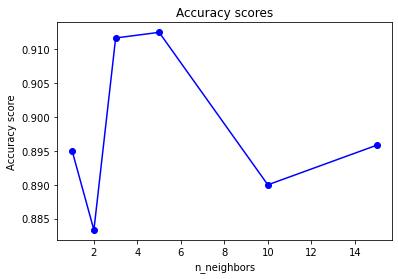

In [8]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

accuracies = []
n_neighbors_values = [1, 2, 3, 5, 10, 15]
for n_neighbor in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbor)
    knn.fit(X_tr, y_tr)
    y_pred = knn.predict(X_te)
    acc = metrics.accuracy_score(y_te, y_pred)
    accuracies.append(acc)
print("Accuracies scores: ", accuracies)
plt.plot(n_neighbors_values, accuracies, color='blue', marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy score')
plt.title('Accuracy scores')

From the above execution, it can be understood that n=3 gives the best output, which is an accuracy score of 0.91083.

In [9]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': [1,2,3,5,10,15]}
neigh = KNeighborsClassifier()
clf = GridSearchCV(neigh, parameters,scoring = 'accuracy', cv = 15)
clf.fit(X, y)
print("best parameter: ", clf.best_params_)
print("best score: ", clf.best_score_)

best parameter:  {'n_neighbors': 3}
best score:  0.8783333333333334


Executing GridSearchCV matches the previous result for the neighbour values, but it gives an accuracy score of 0.878333.

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_te, y_pred))
print(classification_report(y_te, y_pred))

[[216   1   3   0   1   0]
 [  0 136   2   1   3   1]
 [  1   0 248  14   0   2]
 [  0   1  17  88   2  16]
 [  9   1   0   4 101  12]
 [  0   1   2  25   6 286]]
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       221
           2       0.97      0.95      0.96       143
           3       0.91      0.94      0.92       265
           4       0.67      0.71      0.69       124
           5       0.89      0.80      0.84       127
           7       0.90      0.89      0.90       320

    accuracy                           0.90      1200
   macro avg       0.88      0.88      0.88      1200
weighted avg       0.90      0.90      0.90      1200



The report provides detailed outcomes for the different neighbour values chosen in regards to various parameters showing the accuracy of the model. n=1 gives a good outcome, but it is more relevant to design a model with more than 1 neighbour. In this case, n=3 works the best.

## Hyperparameter tuning: criterion='gini' and max_depth

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = data.drop('Label', axis='columns')

# Standardized
scaler = MinMaxScaler()
X_data = X.values
X_scaled = scaler.fit_transform(X_data)
X = X_scaled

y = data['Label']

#Splitting to test and training set
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier(criterion='gini')
Dtc.fit(X_tr, y_tr)

In [ ]:
y_pred = Dtc.predict(X_te)

In [ ]:
print(confusion_matrix(y_te, y_pred))
print(classification_report(y_te, y_pred))

Overall, n=5 is a good option for this model.

In [ ]:
max_depths = range(1, 20)
acc_scores = list()

for depth in max_depths:
    Dtc = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    Dtc.fit(X_tr, y_tr)
    y_pred = Dtc.predict(X_te)
    acc_scores.append(accuracy_score(y_te, y_pred))
    
plt.plot(max_depths, acc_scores, color='blue', marker='o')
plt.title('Accuracy Change w.r.t. Tree Depth')
plt.xlabel('Max Depth')
plt.xticks(max_depths)
plt.ylabel('Accuracy')
plt.show()

When Accuracy vs Max depth is plotted, the values does not change much after depth value 9. After that, the values are close to 1, which means the prediction is close to the actual value. So, the depth is optimal to be 9.